In [1]:
%matplotlib ipympl
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# new channel sum calc as a ratio, where energy(c_0) = sum c_0 / (sum c_1 + sum c_2)

arr = np.zeros((1000,3))

In [3]:
arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [4]:
arr[:,0] = 1
arr

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [9]:
arr[:,1] = 0.5
arr[:,2] = 0.5
arr

array([[1. , 0.5, 0.5],
       [1. , 0.5, 0.5],
       [1. , 0.5, 0.5],
       ...,
       [1. , 0.5, 0.5],
       [1. , 0.5, 0.5],
       [1. , 0.5, 0.5]])

In [6]:
def channel_ratio(attr, channel):
    return np.sum(np.abs(attr[:,channel]))/(np.sum(np.abs(attr)) - np.sum(np.abs(attr[:,channel])))

In [11]:
channel_ratio(arr, 0)

1.0

In [35]:
def get_energies(method, rgb=False):
    conf_conf = [[],[],[]]
    conf_sup = [[],[],[]]
    conf_no = [[],[],[]]
    
    sup_conf = [[],[],[]]
    sup_sup = [[],[],[]]
    sup_no = [[],[],[]]
    
    no_conf = [[],[],[]]
    no_sup = [[],[],[]]
    no_no = [[],[],[]]

    rgb_string=''
    if rgb:
        rgb_string = '_rgb'
    
    for split in range(5):
        for model_ind in range(5):
            with open(f'./energies/energies_coco_{split}_{model_ind}{rgb_string}.pickle', 'rb') as file:
                energies = pickle.load(file)
            
            for i in range(3):
                conf_conf[i].extend(energies['conf']['conf'][i][method])
                conf_sup[i].extend(energies['conf']['sup'][i][method])
                conf_no[i].extend(energies['conf']['norm'][i][method])
                
                sup_conf[i].extend(energies['sup']['conf'][i][method])
                sup_sup[i].extend(energies['sup']['sup'][i][method])
                sup_no[i].extend(energies['sup']['norm'][i][method])
        
                no_conf[i].extend(energies['norm']['conf'][i][method])
                no_sup[i].extend(energies['norm']['sup'][i][method])
                no_no[i].extend(energies['norm']['norm'][i][method])
                
    
        with open(f'./energies/energies_coco_x{rgb_string}_{split}.pickle', 'rb') as file:
                energies_x = pickle.load(file)
        
        combined_energies = {
            'conf': { # conf model on conf/sup/no data
                'conf': conf_conf,
                'sup': conf_sup, 
                'norm': conf_no},
                    
            'sup': { # sup model on conf/sup/no data
                'conf': sup_conf,
                'sup': sup_sup, 
                'norm': sup_no},
        
            'norm': { # no_col model on conf/sup/no data
                'conf': no_conf,
                'sup': no_sup, 
                'norm': no_no},
            
            'x': { # "energy" (proportion of total mass) of the data itself
                'conf': energies_x[0],
                'sup': energies_x[1],
                'norm': energies_x[2]
            }
        }

    return combined_energies

In [36]:
# 3 channel HLS energy plotting
def plot_energies(combined_energies, rgb=False, show=False):
    font_size = 16
    
    fig,axs=plt.subplots(4,3, figsize=(15,10))
    # sns.histplot(ax=axs[1,1],data=[energies['conf']['conf'][0]['lrp_ab'], energies['conf']['conf'][1]['lrp_ab'], energies['conf']['conf'][2]['lrp_ab']],bins=100)
    
    for i, model_name in enumerate(['conf', 'sup', 'norm', 'x']):
        
        for j, dataset in enumerate(['conf', 'sup', 'norm']):
            if i == 0:
                axs[0,j].set_title(dataset, fontsize=font_size)
    #         sns.histplot(ax=axs[i,j],data=[combined_energies[model_name][dataset][0], combined_energies[model_name][dataset][1], combined_energies[model_name][dataset][2]],bins=1000, color=['red','green','blue'])
            
            sns.histplot(ax=axs[i,j],data=combined_energies[model_name][dataset][0],bins=100, color='orange', edgecolor='black')
            sns.histplot(ax=axs[i,j],data=combined_energies[model_name][dataset][1],bins=100, color='green', edgecolor='black', alpha=0.6)
            sns.histplot(ax=axs[i,j],data=combined_energies[model_name][dataset][2],bins=100, edgecolor='black')
        
            # sns.histplot(ax=axs[i,j],data=[np.sum([combined_energies[model_name][dataset][0], combined_energies[model_name][dataset][2]],axis=0), combined_energies[model_name][dataset][0]],bins=100, color=['red','green','blue'])
    #         plt.xlim(0.4,0.58)
            axs[i,j].set_xlim([0.0, 1.0])
            # axs[i,j].set_ylim([0, 200])
            axs[i, j].legend([],[], frameon=False)
    #         axs[i,j].set_ylabel('')
            
    #         if i!=2:
    #             axs[i,j].set_xticks([])
                
    #         if j!=0:
    #             axs[i,j].set_yticks([])
            
            #         axs[i,j].set_title(f'model: {model_name}, dataset: {dataset}')
        axs[i,0].set_ylabel(model_name, fontsize=16)
    
    # axs[0,0].legend(['red channel', 'sum(green,blue)'],loc='upper center', bbox_to_anchor=(3.0, 1.5), ncol=1)
    # axs[0,0].legend(['red channel', 'blue channel'],loc='upper center', bbox_to_anchor=(3.0, 1.5), ncol=1)

    if not rgb:
        axs[0,0].legend(['hue channel', 'lightness channel', 'saturation channel'],loc='upper center', bbox_to_anchor=(3.0, 1.5), ncol=1)
    else:
        axs[0,0].legend(['red channel', 'green channel', 'blue channel'],loc='upper center', bbox_to_anchor=(3.0, 1.5), ncol=1)
    
    plt.figtext(0.07,0.5,"Model", va="center", ha="center", size=font_size+2,rotation='vertical')
    plt.figtext(0.5,0.95,"Test Dataset", va="center", ha="center", size=font_size+2,)
    plt.figtext(0.5,0.05,f"Proportion of importance per channel ({method})", va="center", ha="center", size=font_size+2,)

    rgb_string=''
    if rgb:
        rgb_string = '_rgb'
    
    plt.savefig(f'./figures/coco/quantitative_{method}{rgb_string}.png', bbox_inches='tight')

    if show:
        plt.show()

In [37]:
# H and S channels combined for sum(H,S) vs (L) comparison
def plot_combined(combined_energies, show=False):
    font_size = 16
    
    fig,axs=plt.subplots(4,3, figsize=(15,10))
    # sns.histplot(ax=axs[1,1],data=[energies['conf']['conf'][0]['lrp_ab'], energies['conf']['conf'][1]['lrp_ab'], energies['conf']['conf'][2]['lrp_ab']],bins=100)
    
    for i, model_name in enumerate(['conf', 'sup', 'norm', 'x']):
        
        for j, dataset in enumerate(['conf', 'sup', 'norm']):
            if i == 0:
                axs[0,j].set_title(dataset, fontsize=font_size)
    #         sns.histplot(ax=axs[i,j],data=[combined_energies[model_name][dataset][0], combined_energies[model_name][dataset][1], combined_energies[model_name][dataset][2]],bins=1000, color=['red','green','blue'])
            
            # sns.histplot(ax=axs[i,j],data=combined_energies[model_name][dataset][0],bins=100, color='orange', edgecolor='black')
            # sns.histplot(ax=axs[i,j],data=combined_energies[model_name][dataset][1],bins=100, color='green', edgecolor='black', alpha=0.6)
            # sns.histplot(ax=axs[i,j],data=combined_energies[model_name][dataset][2],bins=100, edgecolor='black')
        
            sns.histplot(ax=axs[i,j],data=[np.sum([combined_energies[model_name][dataset][0], combined_energies[model_name][dataset][2]],axis=0), combined_energies[model_name][dataset][1]],bins=100)
    #         plt.xlim(0.4,0.58)
            axs[i,j].set_xlim([0.0, 1.0])
            # axs[i,j].set_ylim([0, 200])
            axs[i, j].legend([],[], frameon=False)
    #         axs[i,j].set_ylabel('')
            
    #         if i!=2:
    #             axs[i,j].set_xticks([])
                
    #         if j!=0:
    #             axs[i,j].set_yticks([])
            
            #         axs[i,j].set_title(f'model: {model_name}, dataset: {dataset}')
        axs[i,0].set_ylabel(model_name, fontsize=16)

    axs[0,0].legend(['lightness', 'sum(hue,saturation)'],loc='upper center', bbox_to_anchor=(3.0, 1.5), ncol=1)
    
    # axs[0,0].legend(['hue channel', 'lightness channel', 'saturation channel'],loc='upper center', bbox_to_anchor=(3.0, 1.5), ncol=1)
    
    plt.figtext(0.07,0.5,"Model", va="center", ha="center", size=font_size+2,rotation='vertical')
    plt.figtext(0.5,0.95,"Test Dataset", va="center", ha="center", size=font_size+2,)
    plt.figtext(0.5,0.05,f"Proportion of importance per channel ({method})", va="center", ha="center", size=font_size+2,)
    
    plt.savefig(f'./figures/coco/quantitative_{method}_combined.png', bbox_inches='tight')

    if show:
        plt.show()

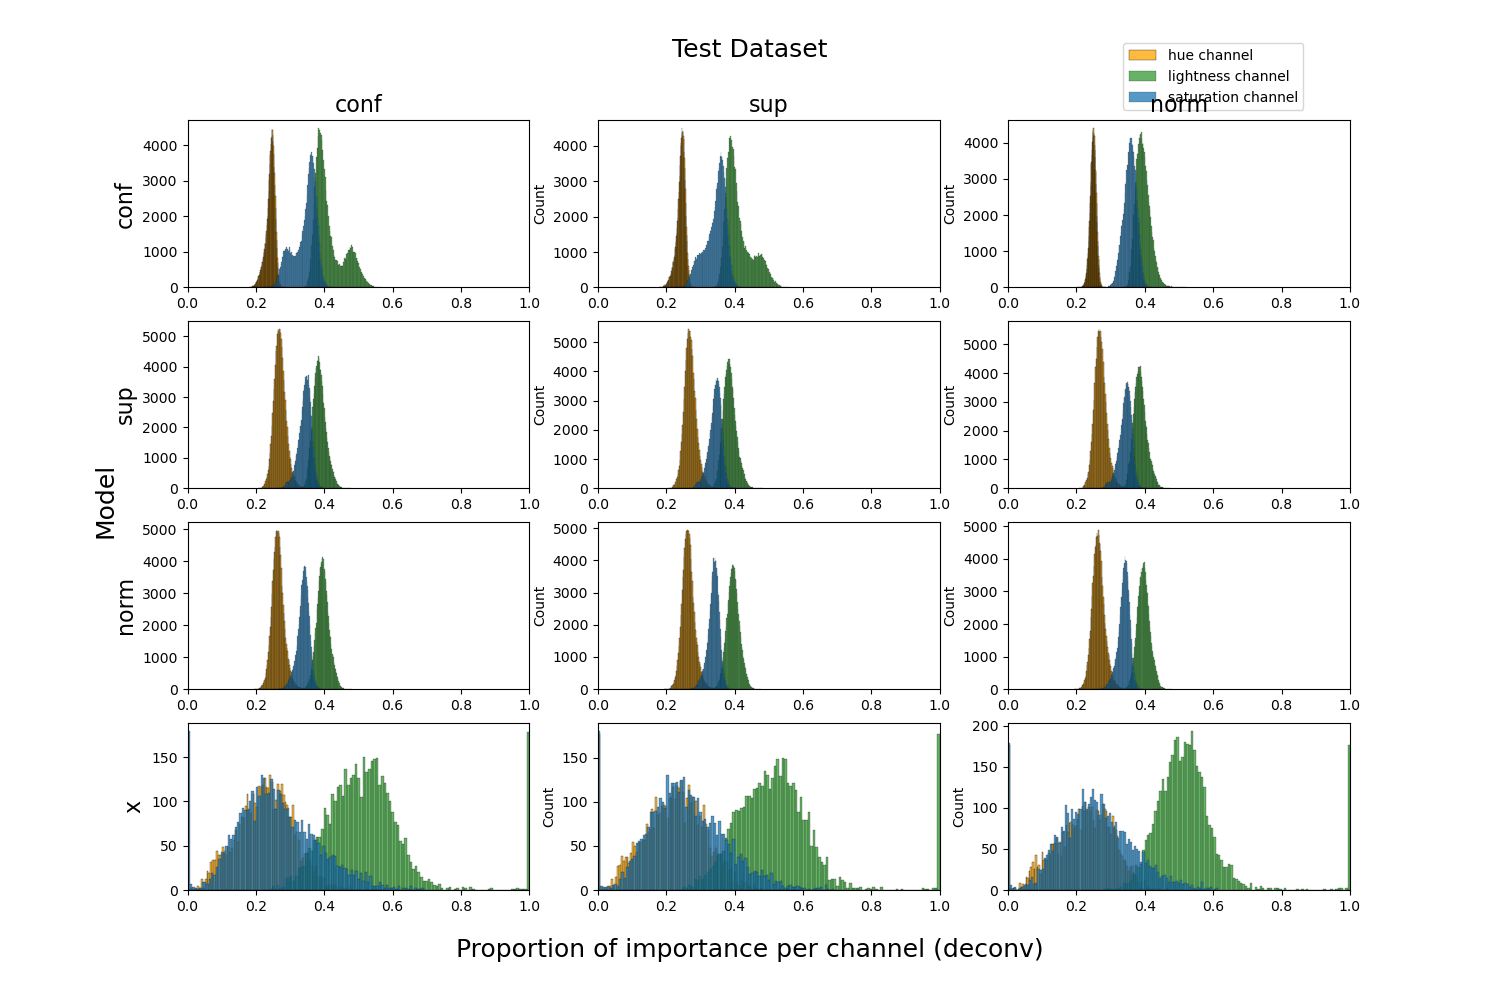

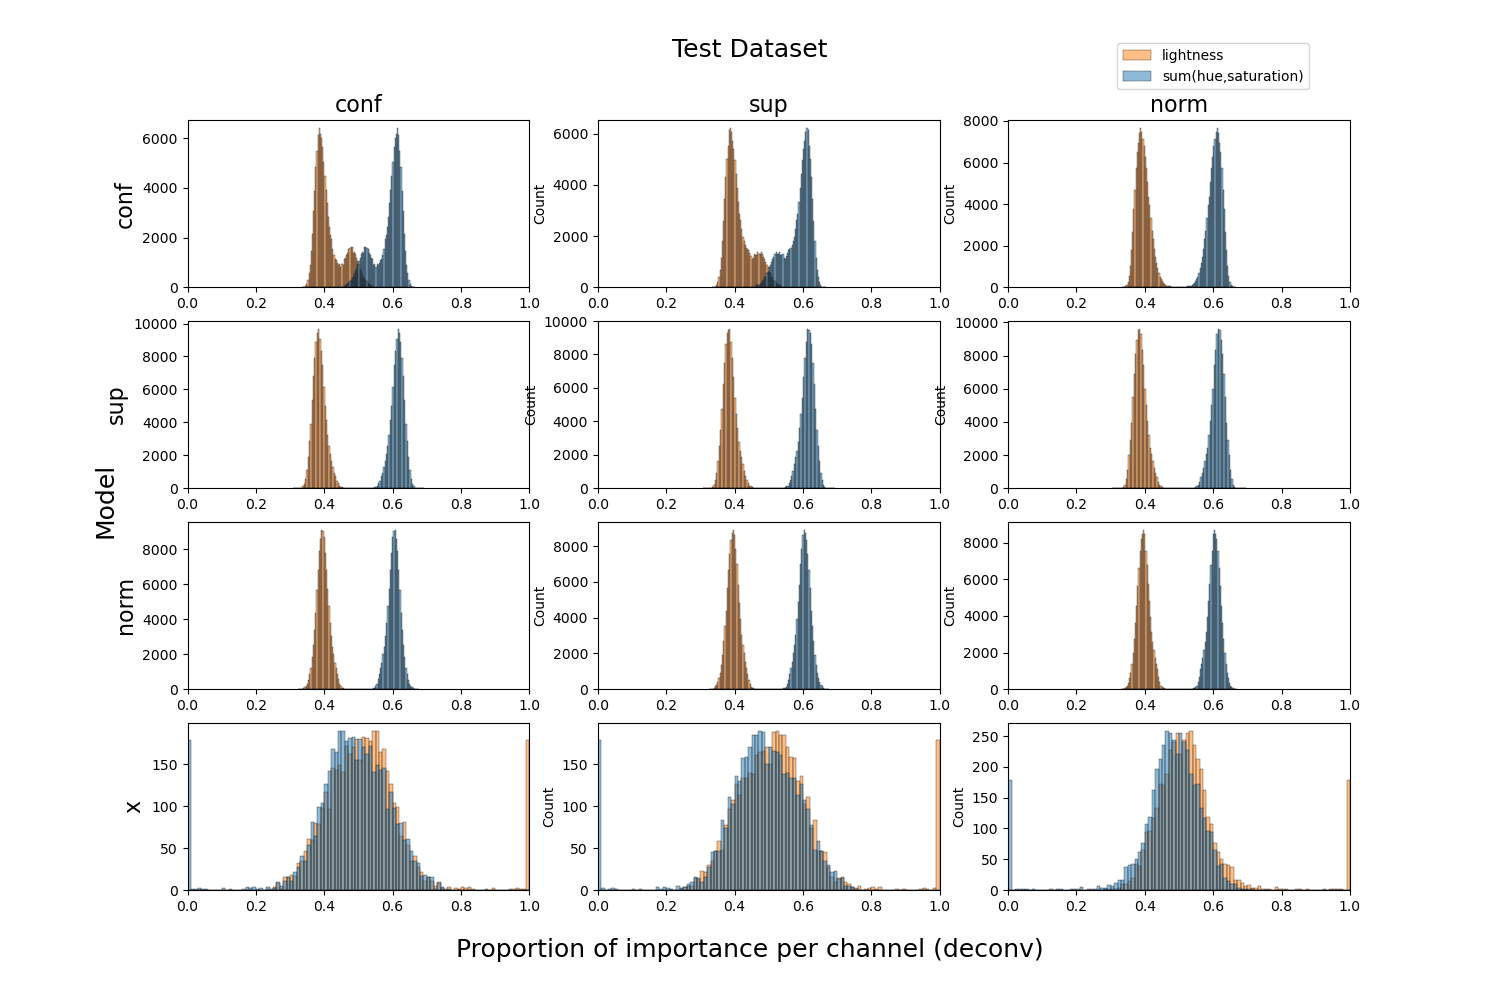

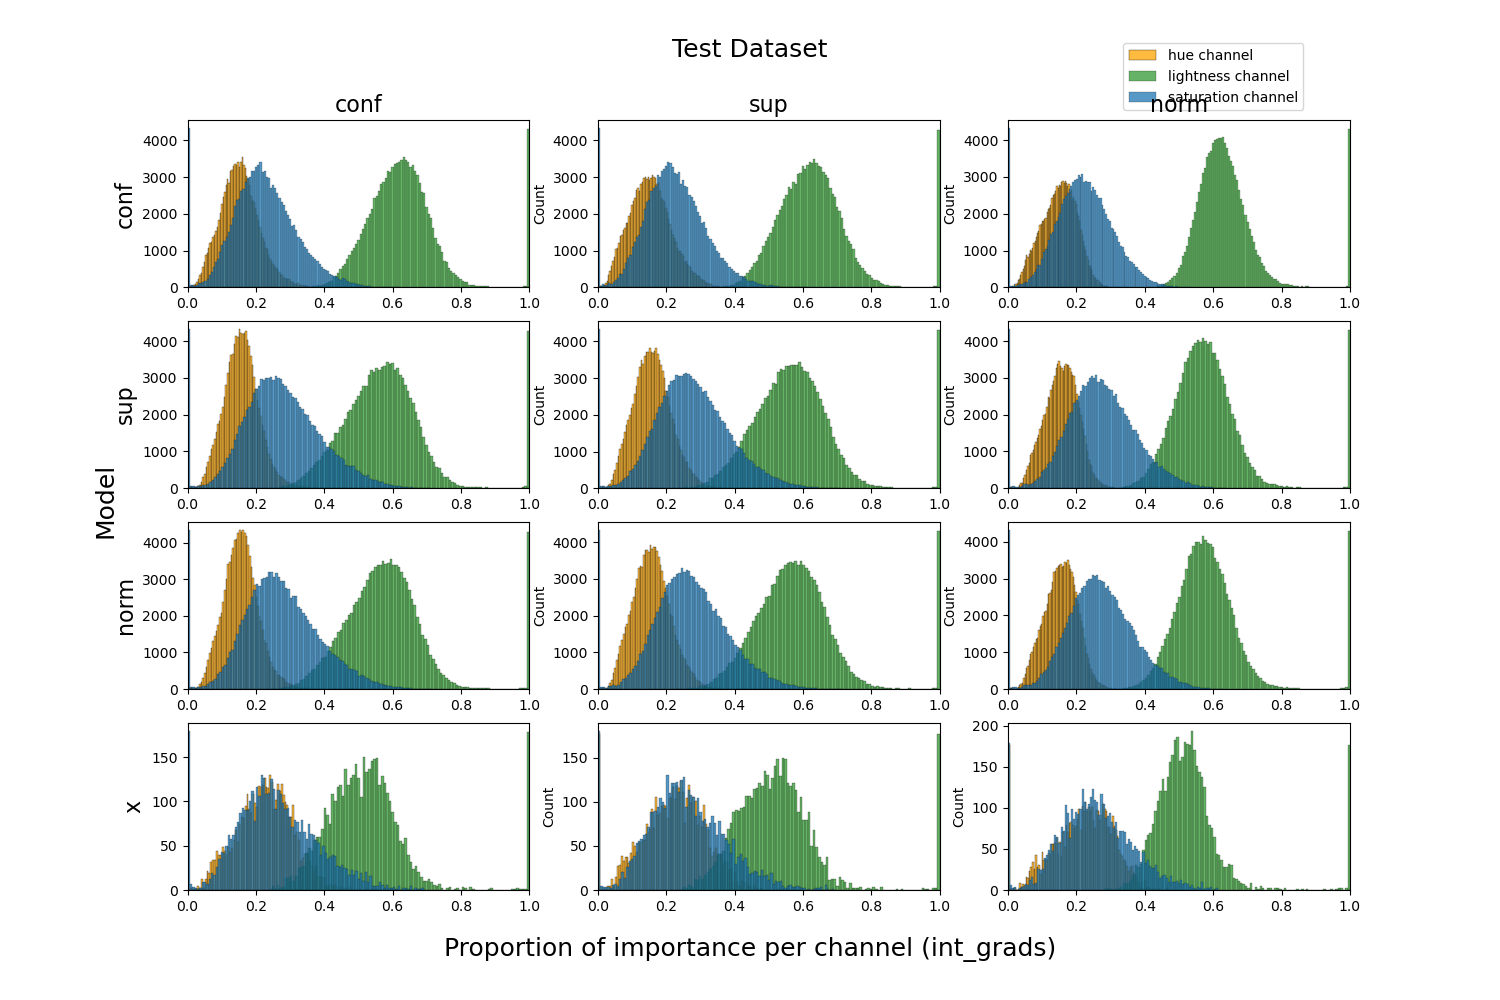

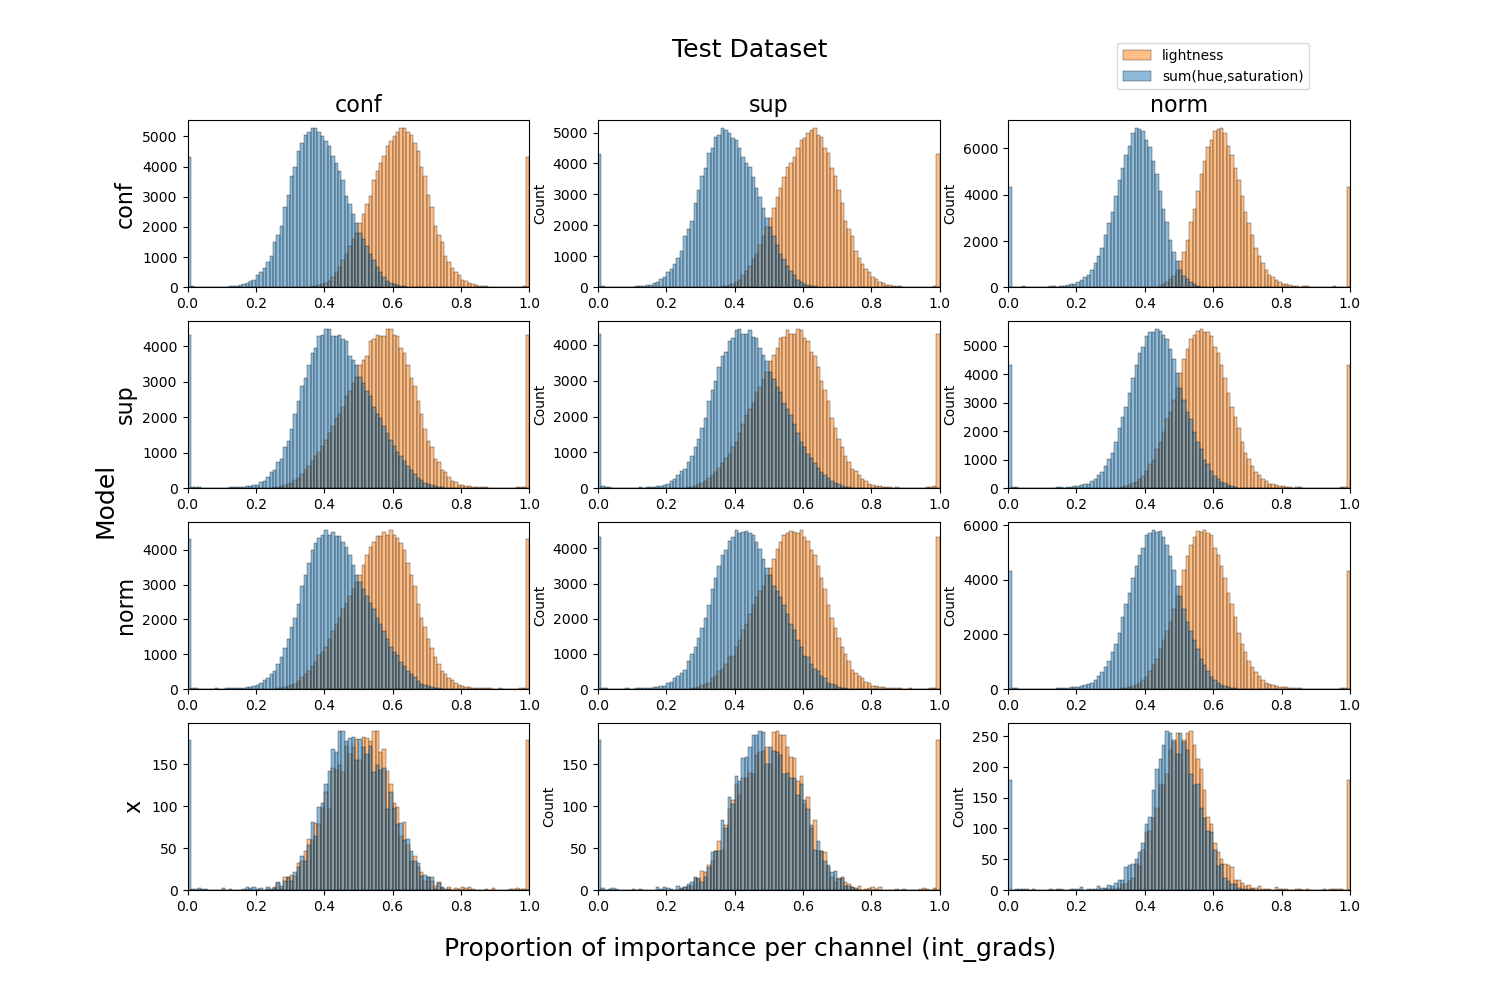

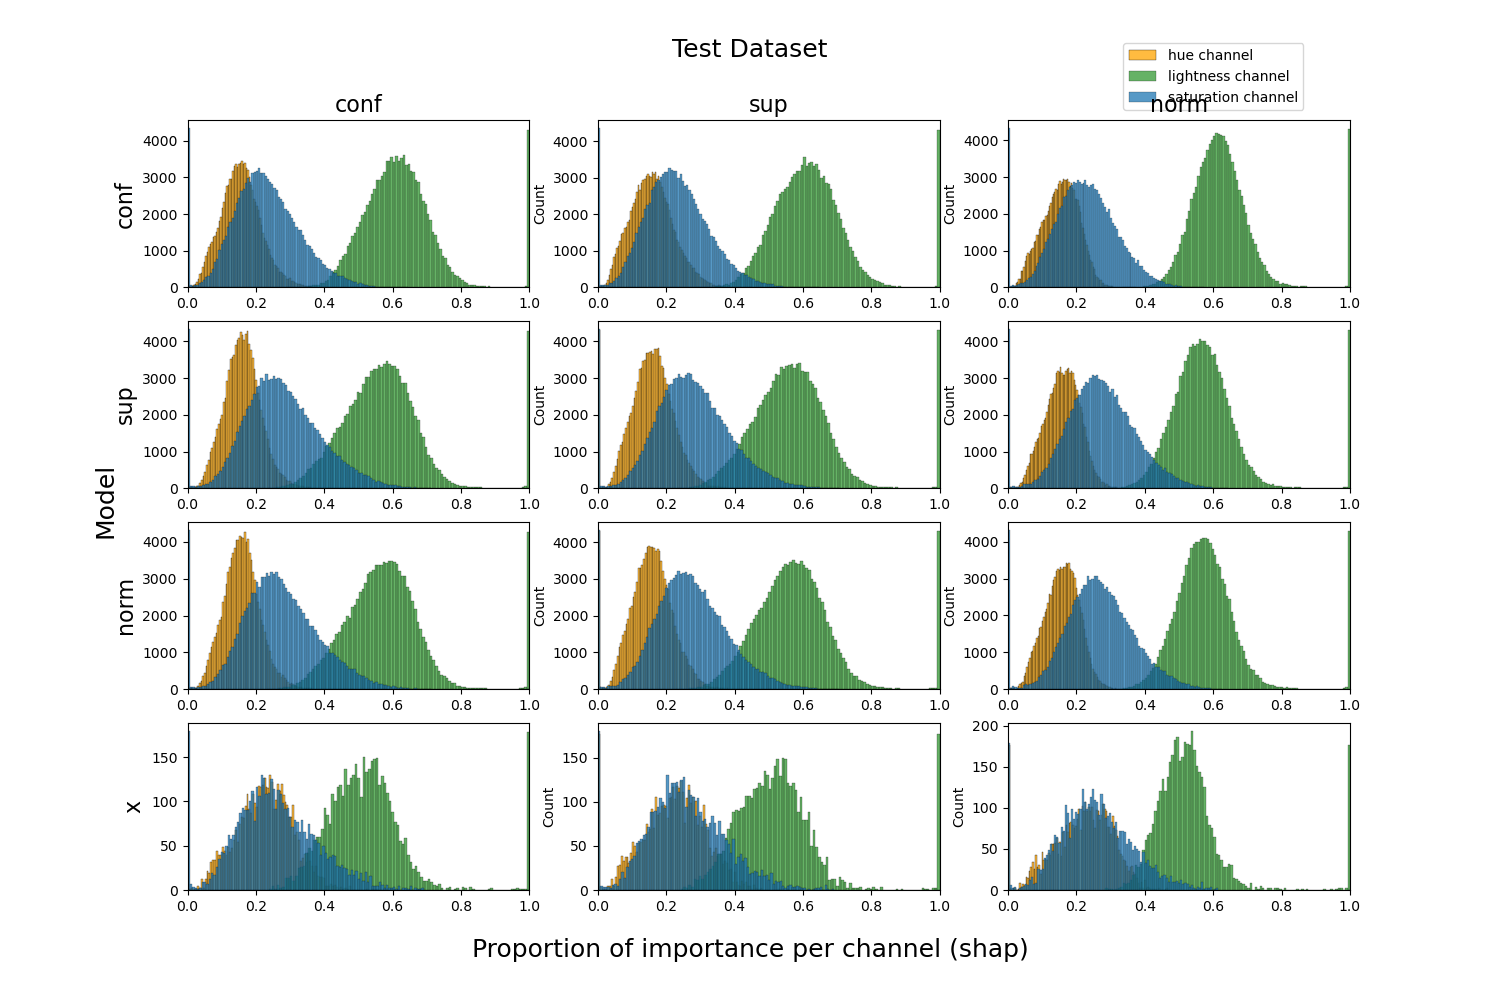

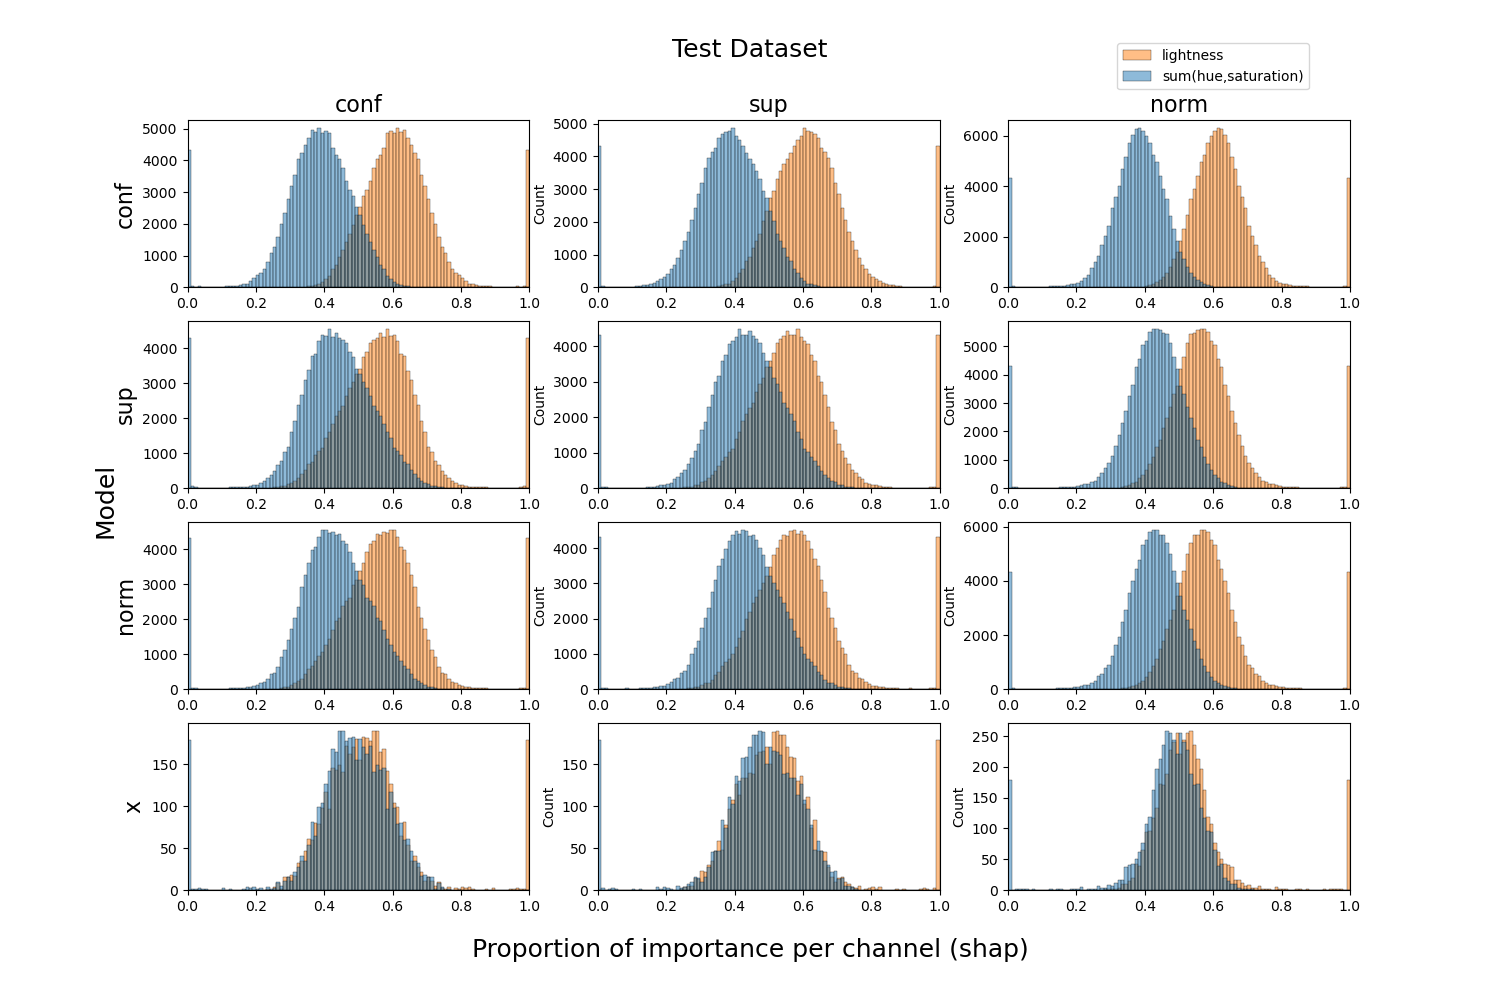

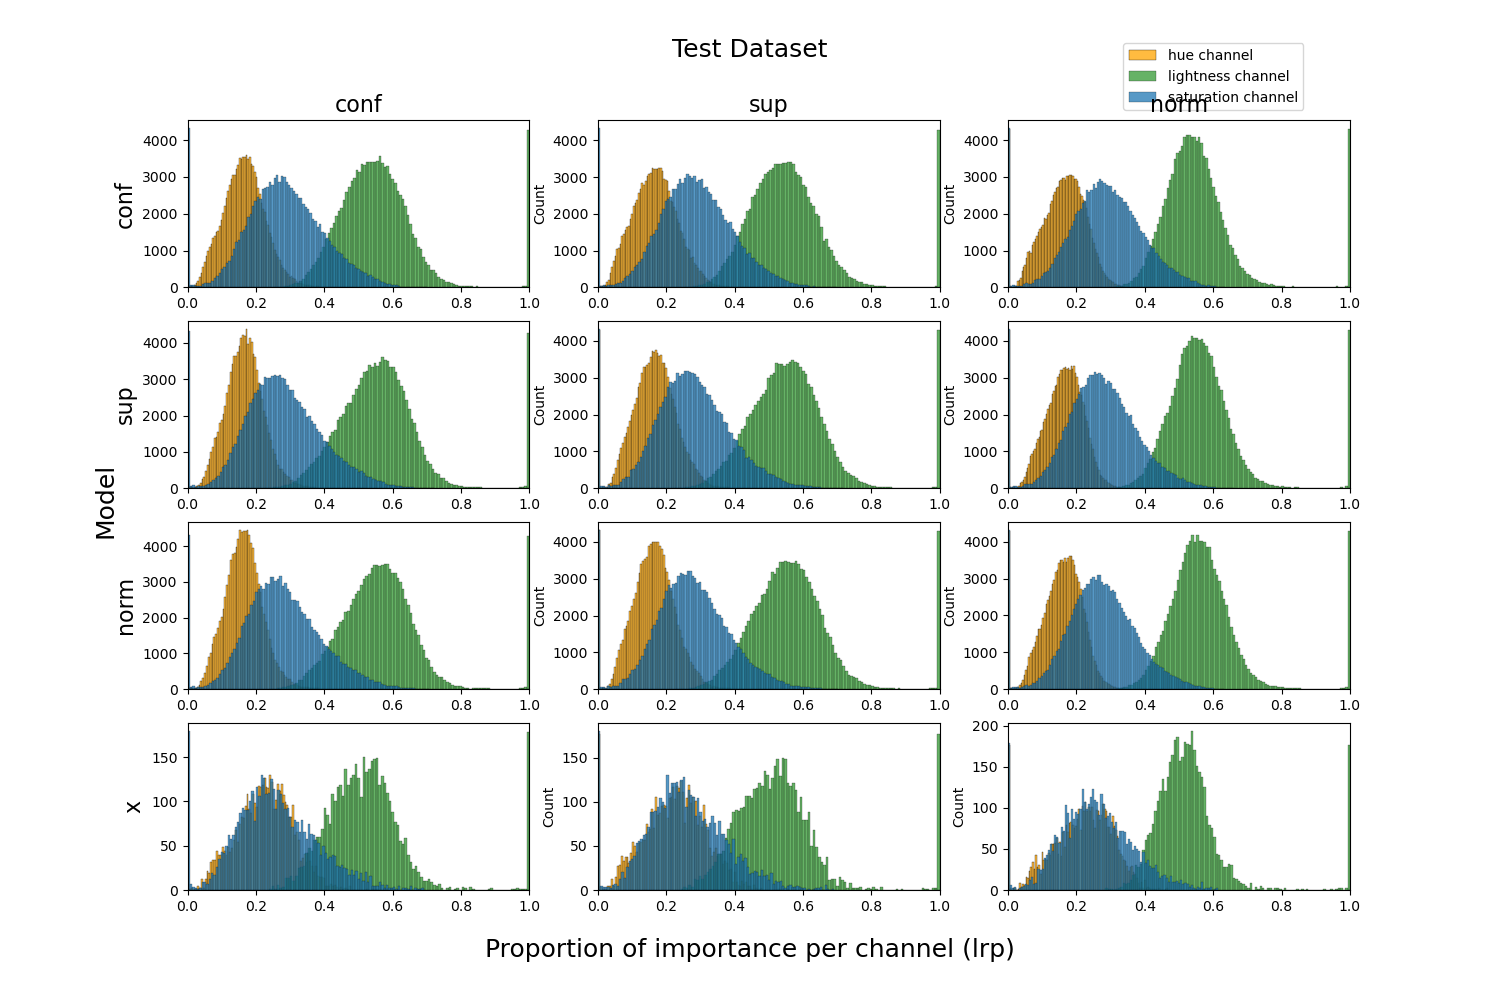

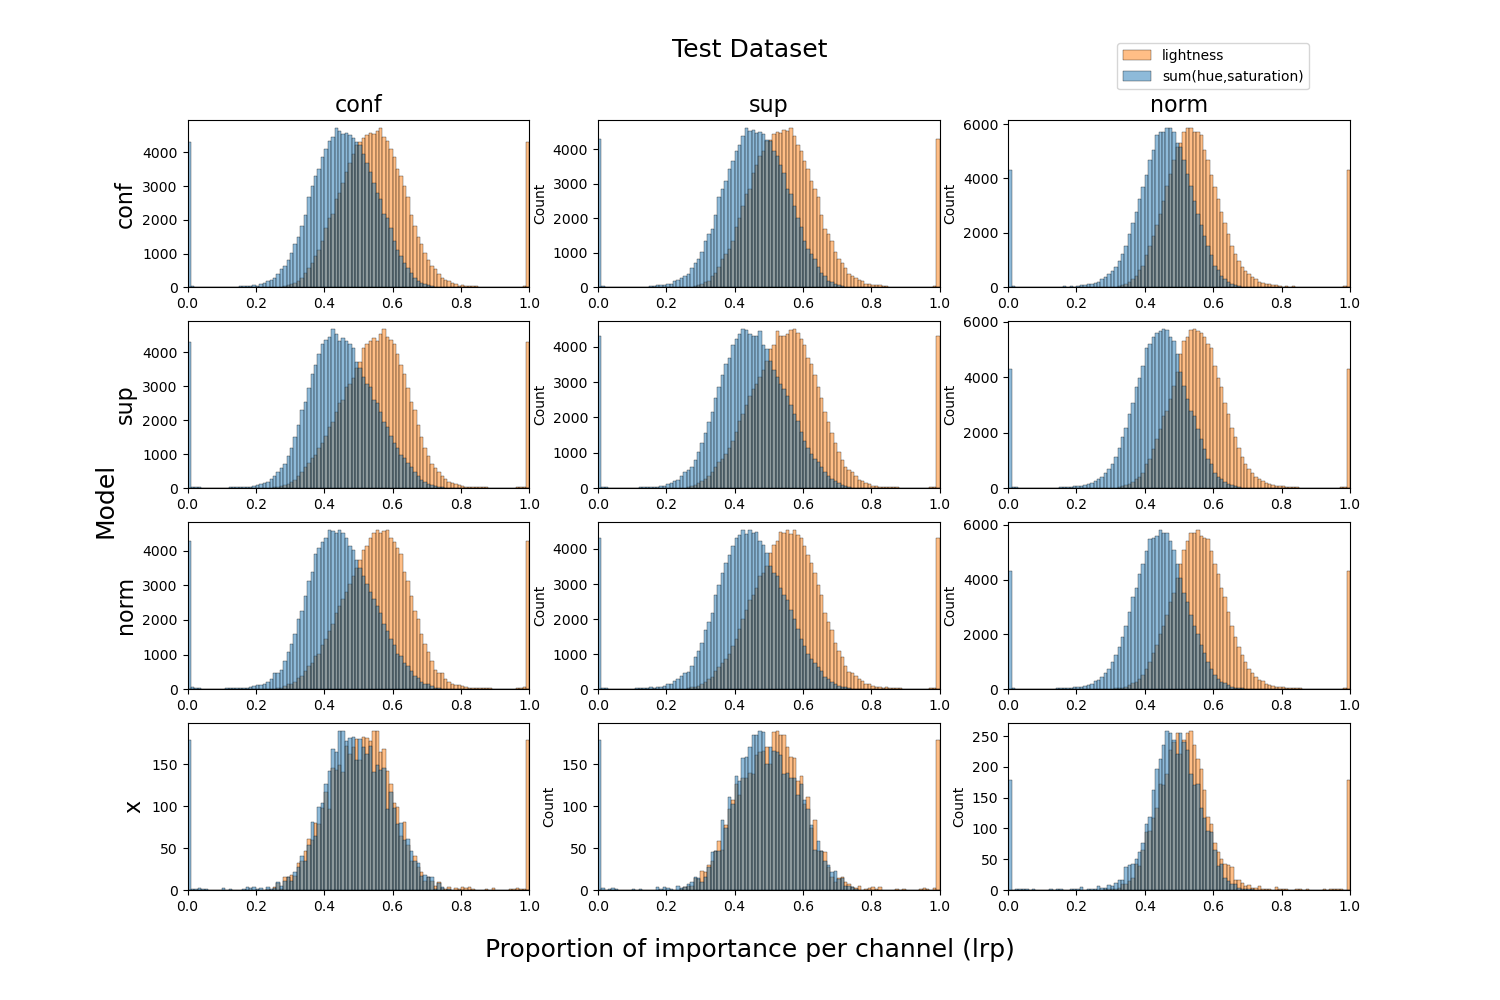

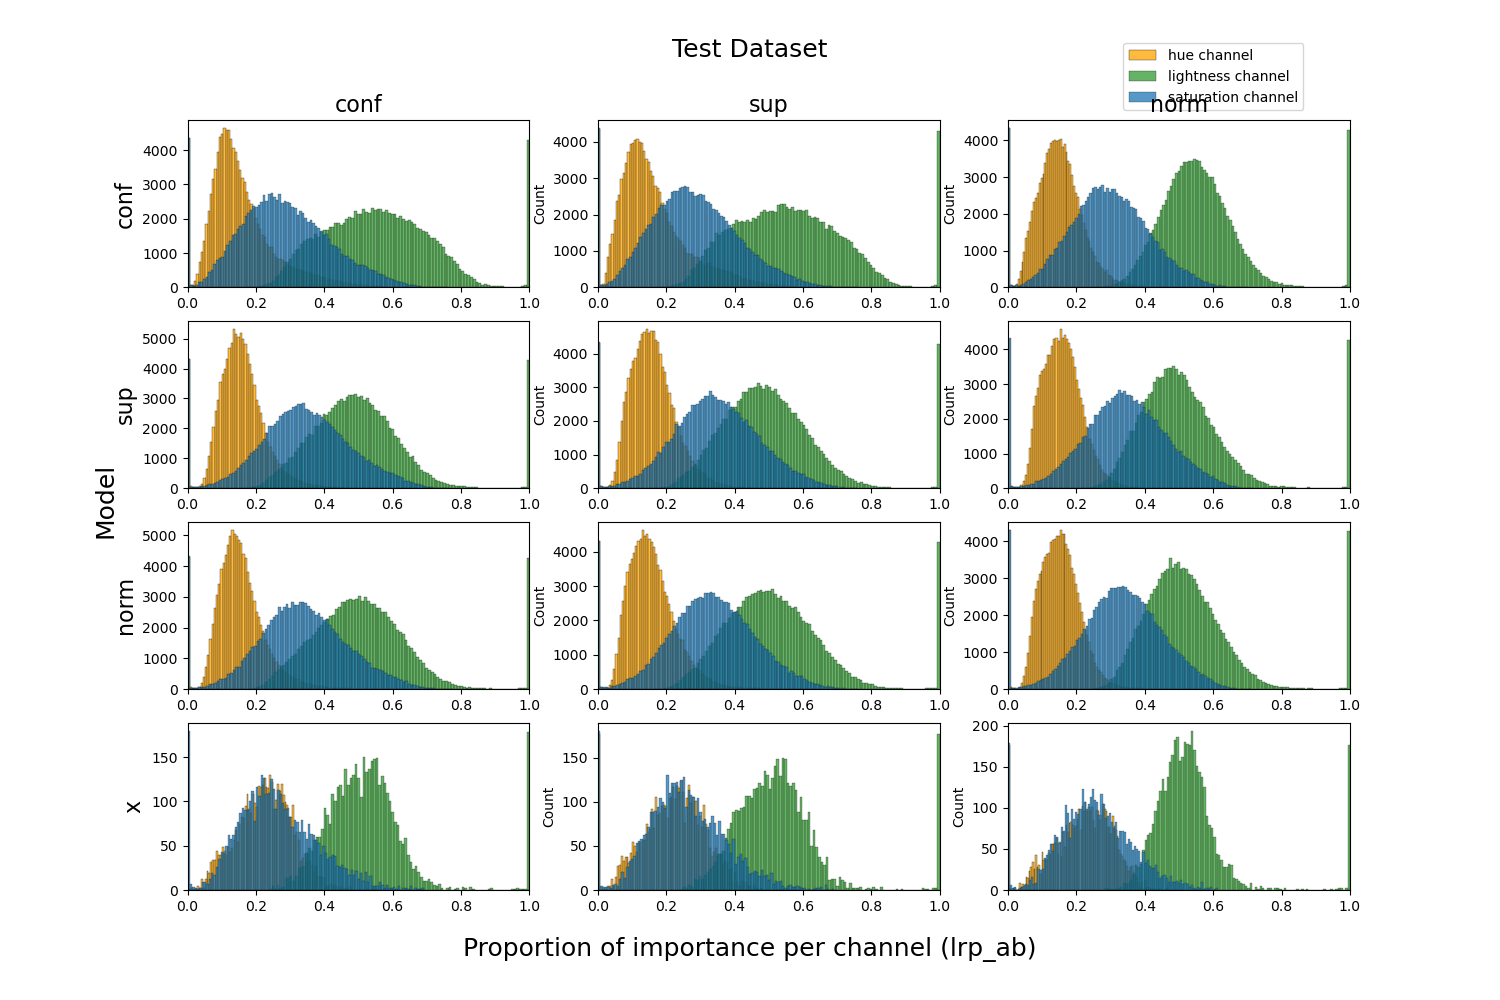

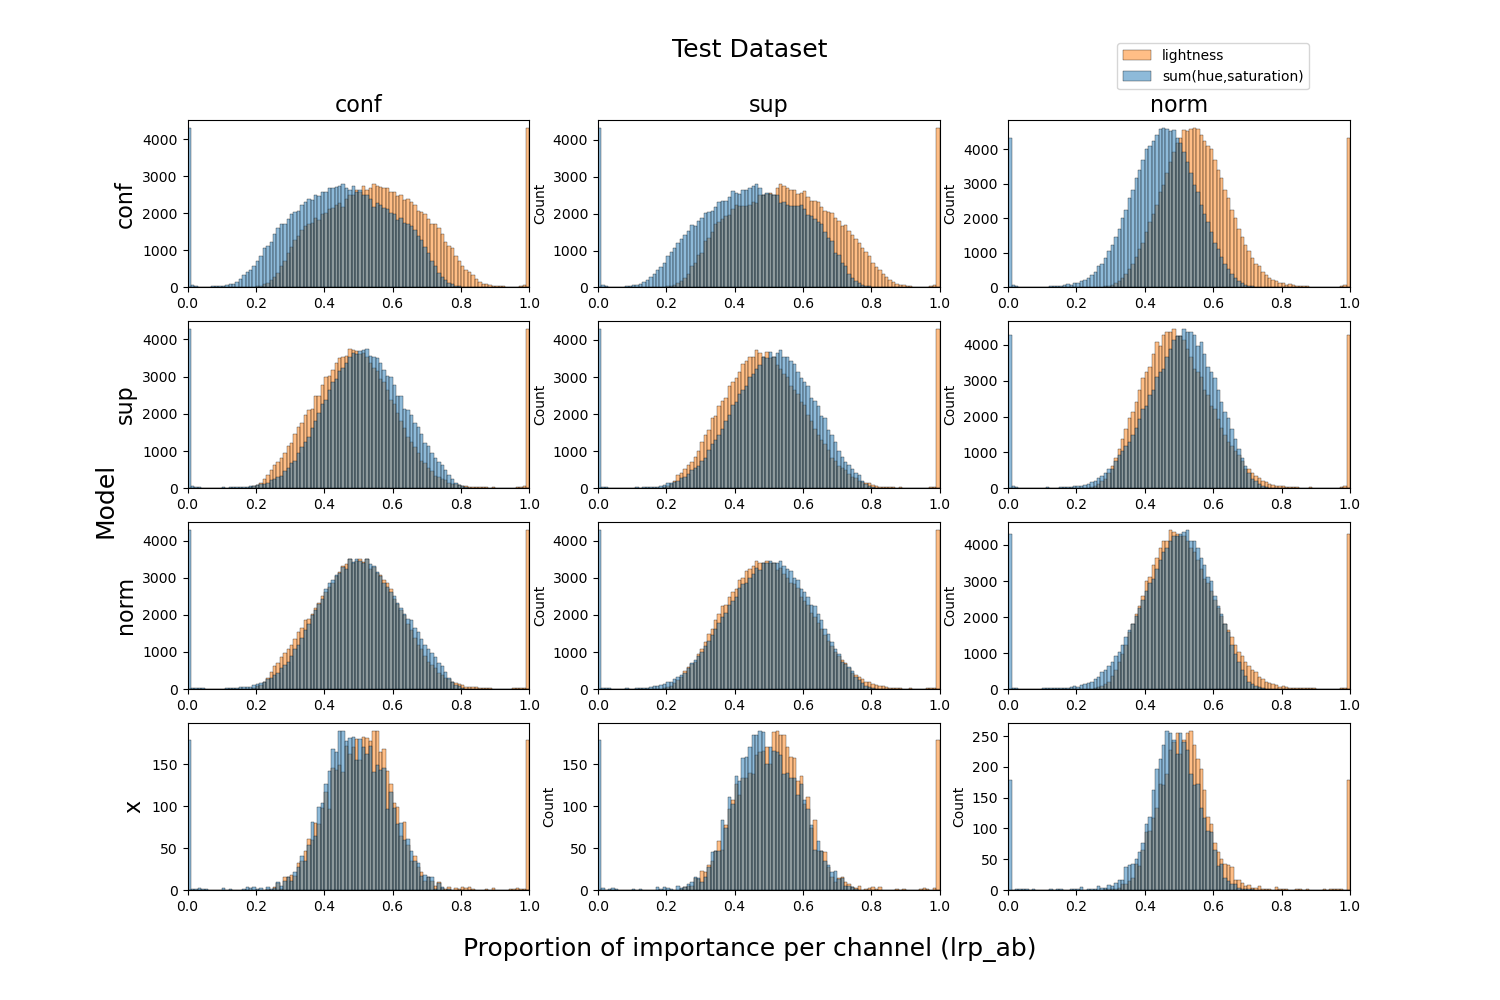

In [38]:
for method in ['deconv', 'int_grads', 'shap', 'lrp', 'lrp_ab']:
    combined_energies = get_energies(method)
    plot_energies(combined_energies)
    plot_combined(combined_energies)

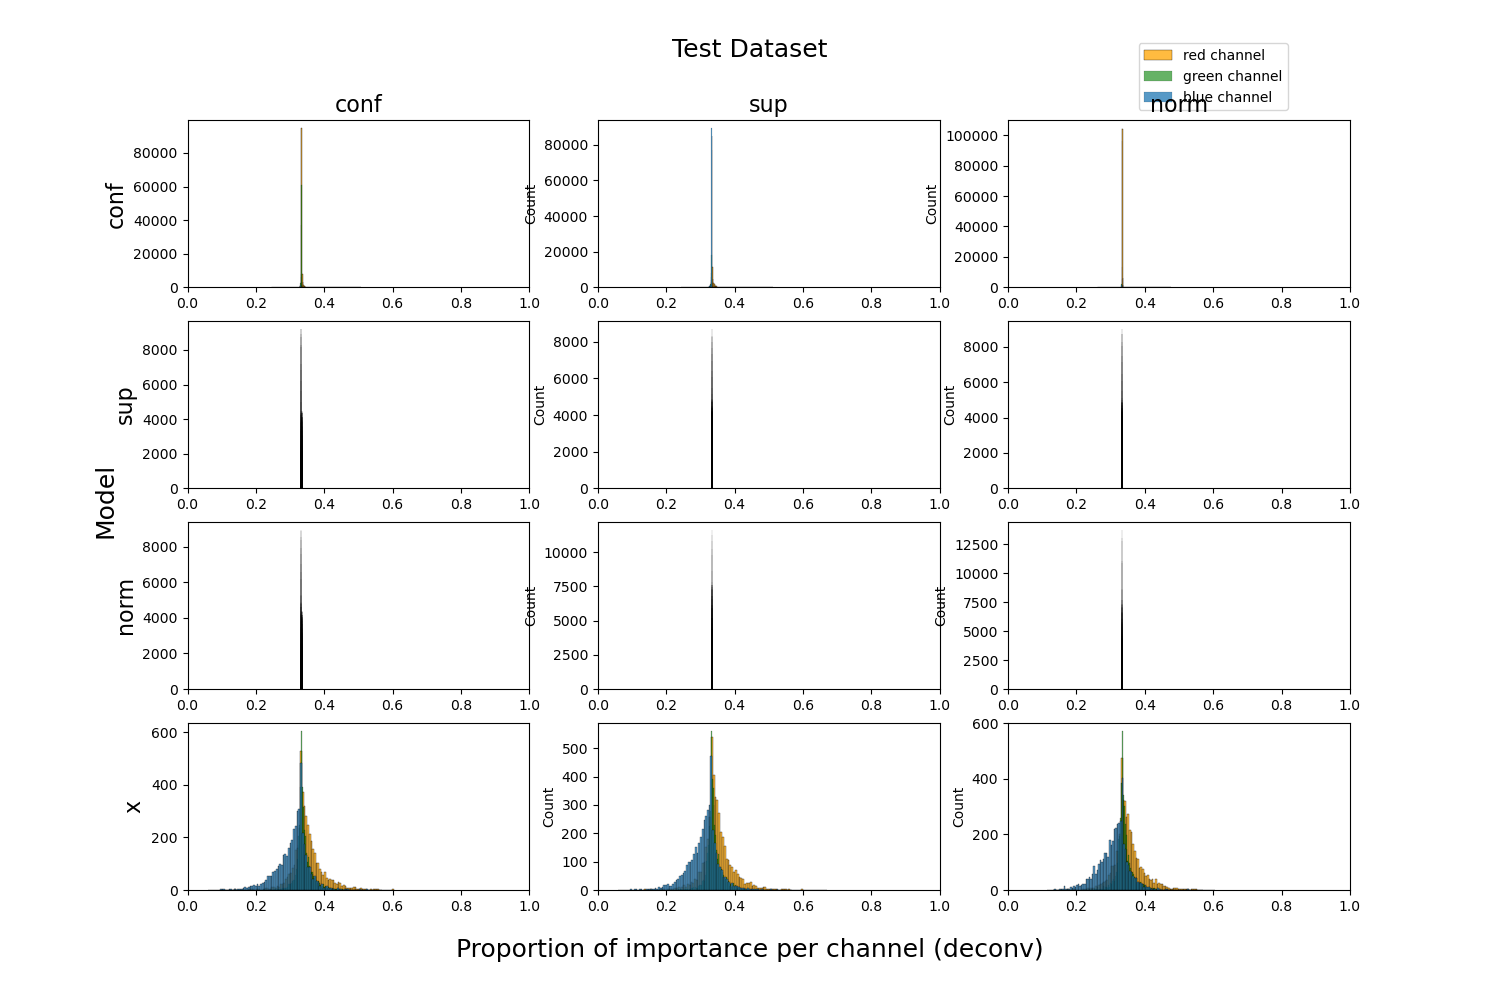

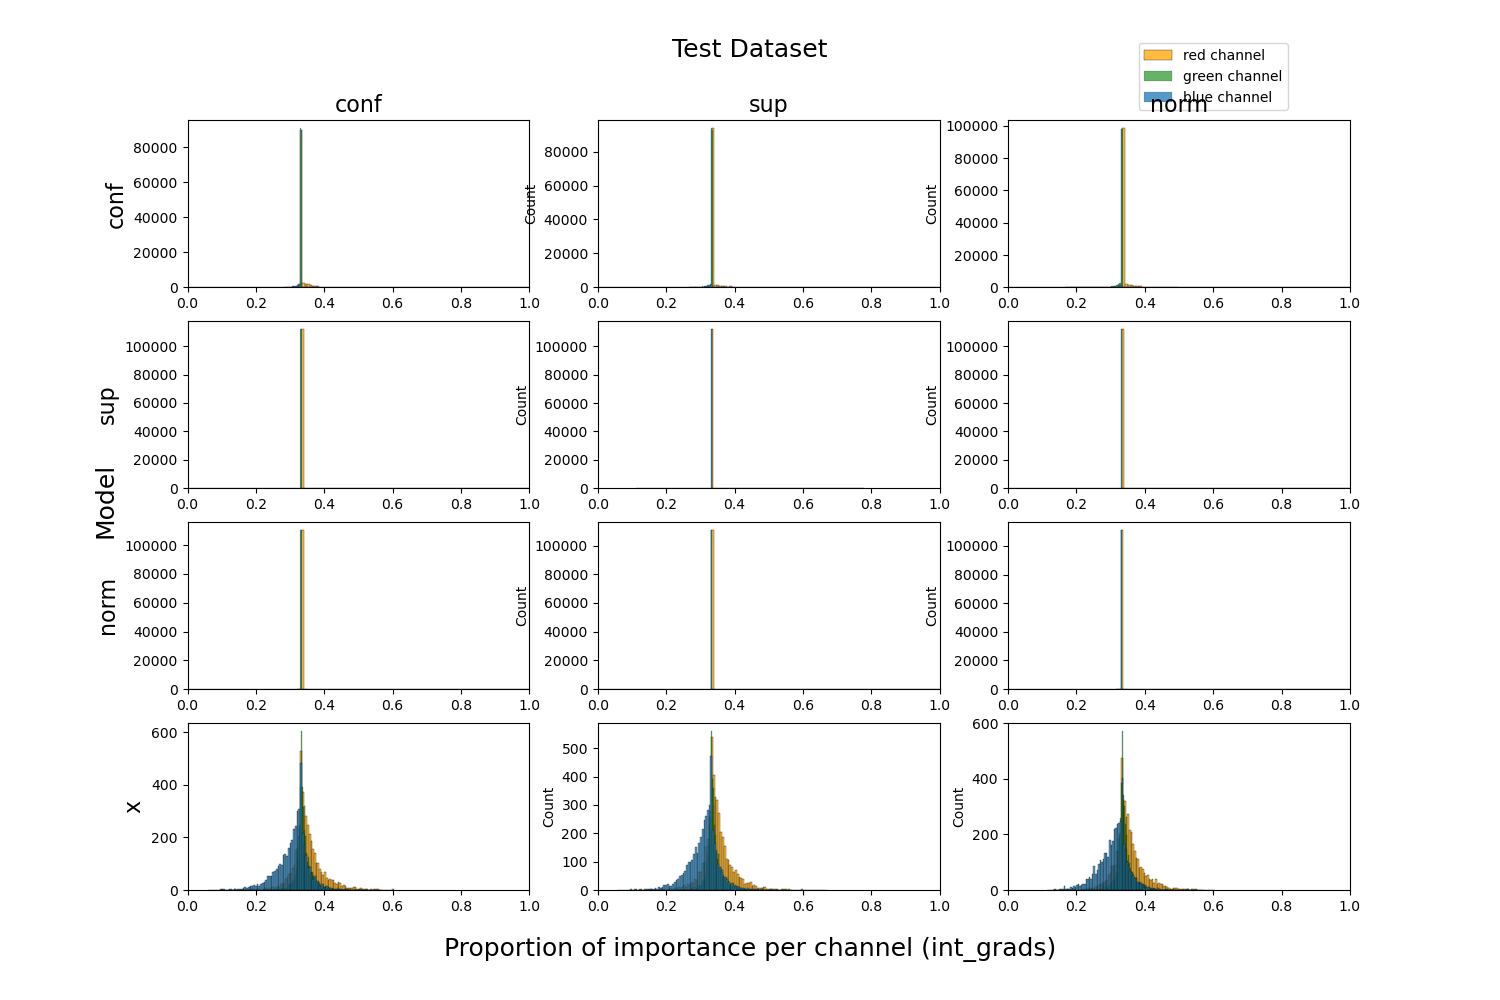

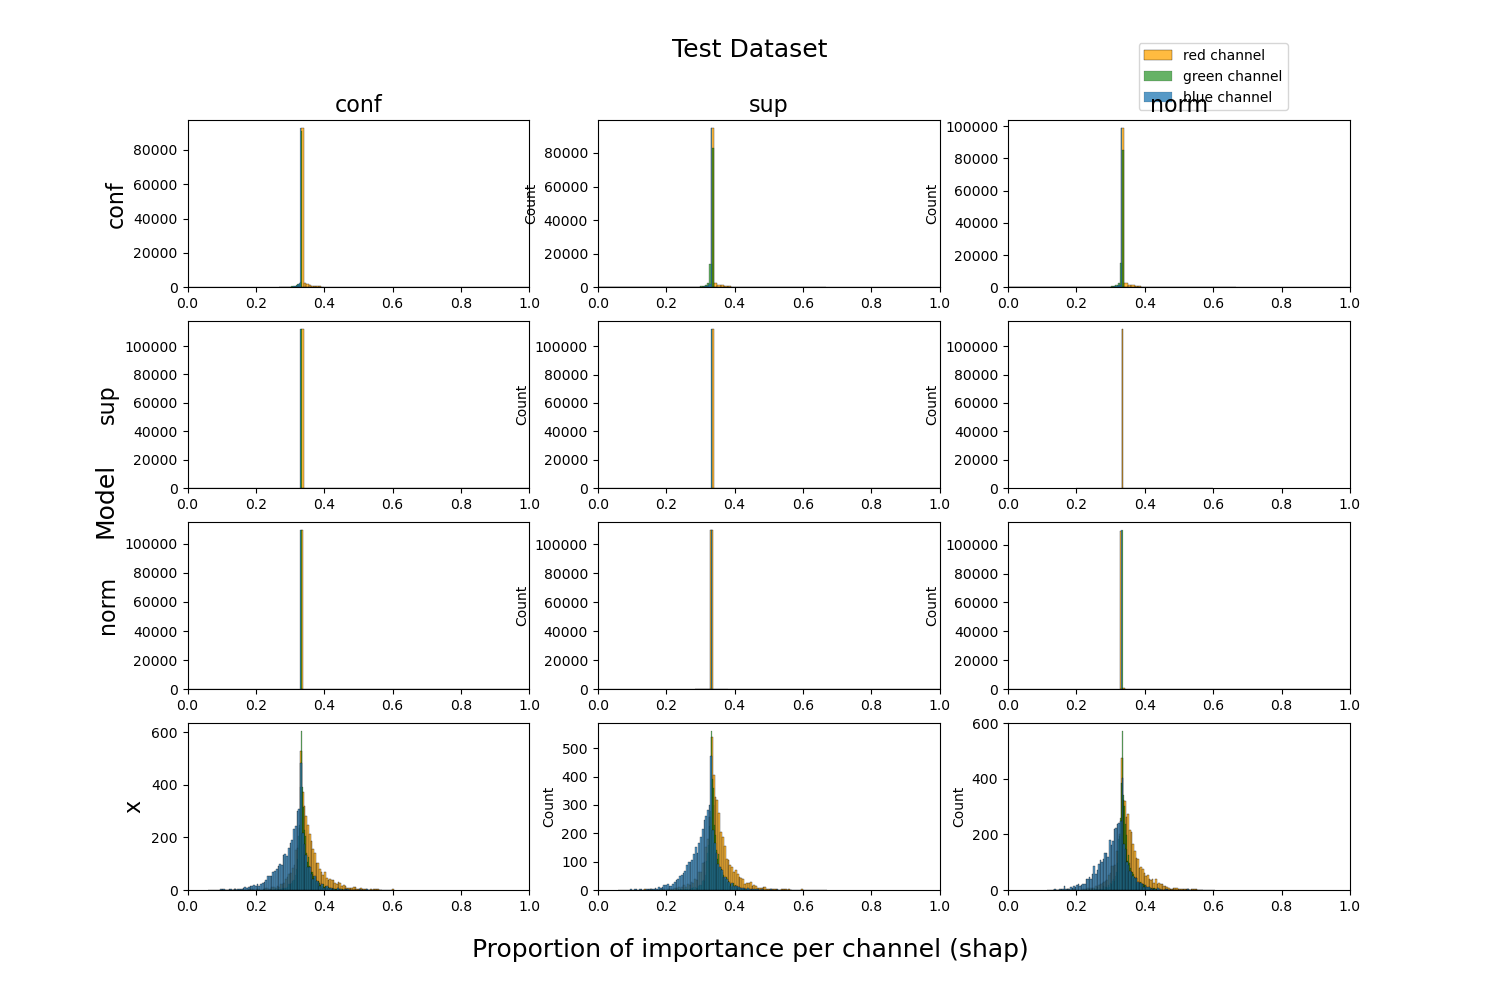

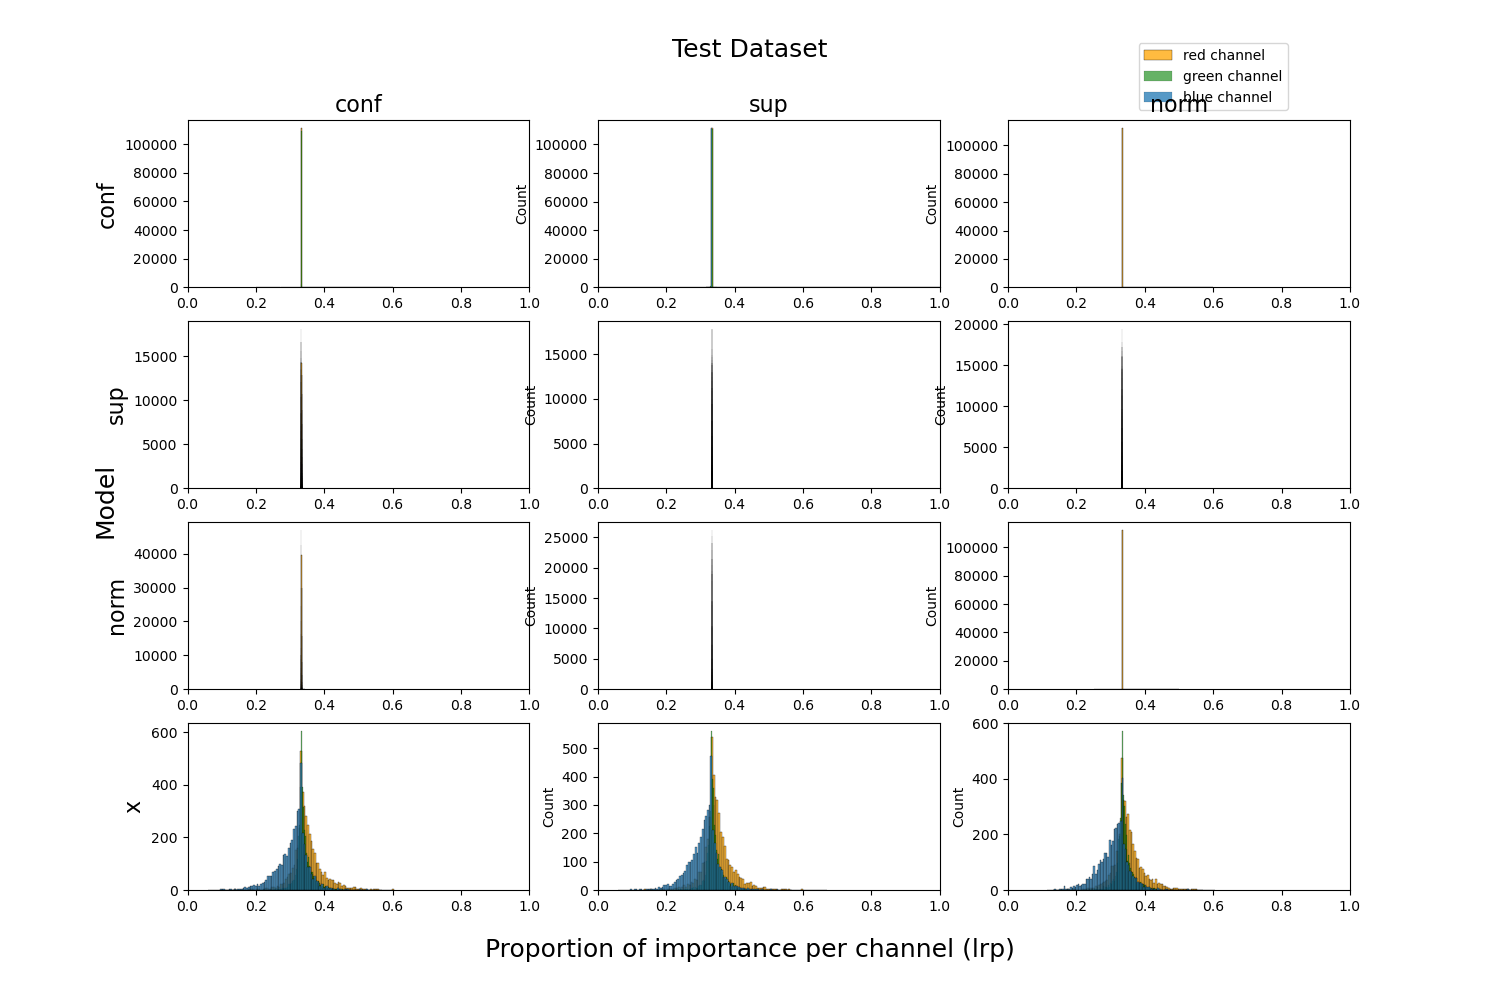

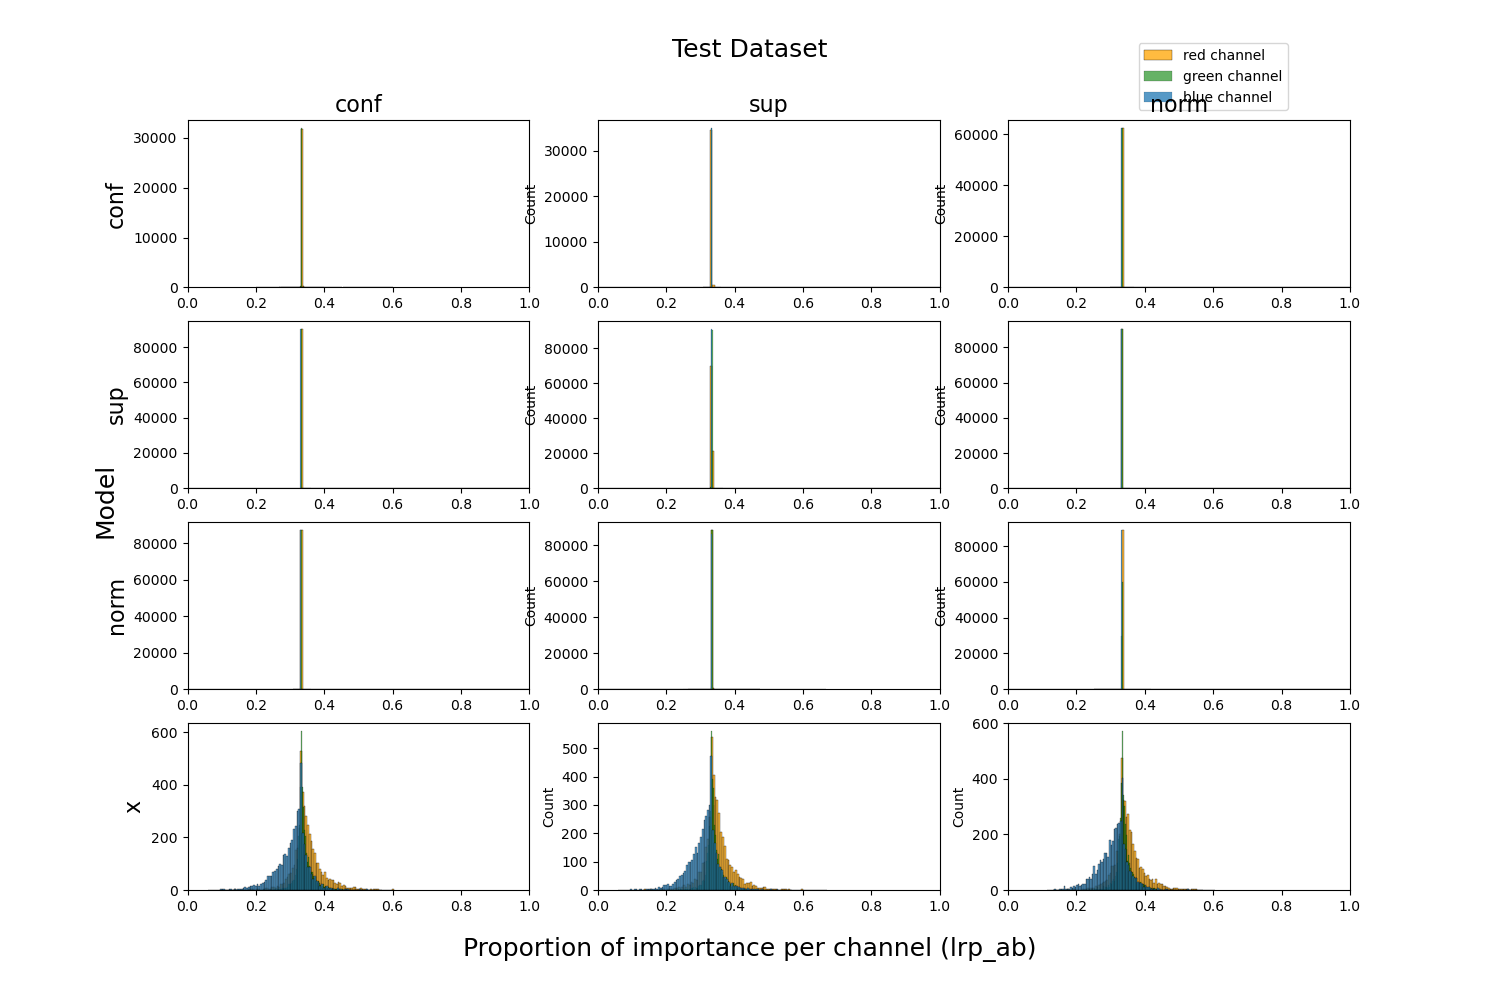

In [39]:
for method in ['deconv', 'int_grads', 'shap', 'lrp', 'lrp_ab']:
    combined_energies = get_energies(method, rgb=True)
    plot_energies(combined_energies, rgb=True)
    # plot_combined(combined_energies, rgb=True)

In [28]:
import torch
conf_data_res = []
sup_data_res = []
no_data_res = []

for i in range(5):
    with open(f'./aurocs/auroc_results_coco_{i}.pickle', 'rb') as f:
        auroc_results = pickle.load(f)

    conf_data_res.extend(auroc_results[0])
    sup_data_res.extend(auroc_results[1])
    no_data_res.extend(auroc_results[2])
    
    # print("SPLIT: ", i)
print('conf data: ', torch.mean(torch.tensor(conf_data_res), axis=0))
print('sup data: ', torch.mean(torch.tensor(sup_data_res), axis=0))
print('no mark data: ', torch.mean(torch.tensor(no_data_res), axis=0))
print('\nSTD\n')
print('conf data: ', torch.std(torch.tensor(conf_data_res), axis=0))
print('sup data: ', torch.std(torch.tensor(sup_data_res), axis=0))
print('no mark data: ', torch.std(torch.tensor(no_data_res), axis=0))

conf data:  tensor([0.9677, 0.8918, 0.8751])
sup data:  tensor([0.6429, 0.8914, 0.8771])
no mark data:  tensor([0.8702, 0.8955, 0.8983])

STD

conf data:  tensor([0.0017, 0.0081, 0.0213])
sup data:  tensor([0.0143, 0.0065, 0.0084])
no mark data:  tensor([0.0085, 0.0068, 0.0070])


In [32]:
# dct[model][data]
preds = {
    'conf': {'conf': [], 'sup': [], 'no': [] },
    'sup': {'conf': [], 'sup': [], 'no': [] },
    'no': {'conf': [], 'sup': [], 'no': [] } 
}

labels = {
    'conf': [],
    'sup': [],
    'no': [] 
}


for i in range(5):
    with open(f'./aurocs/auroc_conf_coco_{i}.pickle', 'rb') as f:
        preds_conf = pickle.load(f)

    with open(f'./aurocs/auroc_sup_coco_{i}.pickle', 'rb') as f:
        preds_sup = pickle.load(f)

    with open(f'./aurocs/auroc_norm_coco_{i}.pickle', 'rb') as f:
        preds_no = pickle.load(f)

    
    with open(f'./aurocs/conf_labels_coco_{i}.pickle', 'rb') as f:
        labels_conf = pickle.load(f)

    with open(f'./aurocs/sup_labels_coco_{i}.pickle', 'rb') as f:
        labels_sup = pickle.load(f)

    with open(f'./aurocs/norm_labels_coco_{i}.pickle', 'rb') as f:
        labels_no = pickle.load(f)

    
    labels_dataset = [labels_conf, labels_sup, labels_no] 
    pred_model = [preds_conf, preds_sup, preds_no]

    for j, (model, models) in enumerate(preds.items()):
        for k, (data, results) in enumerate(models.items()):
            preds[model][data].extend(pred_model[j][k])
            
        labels[model].extend(labels_dataset[j])


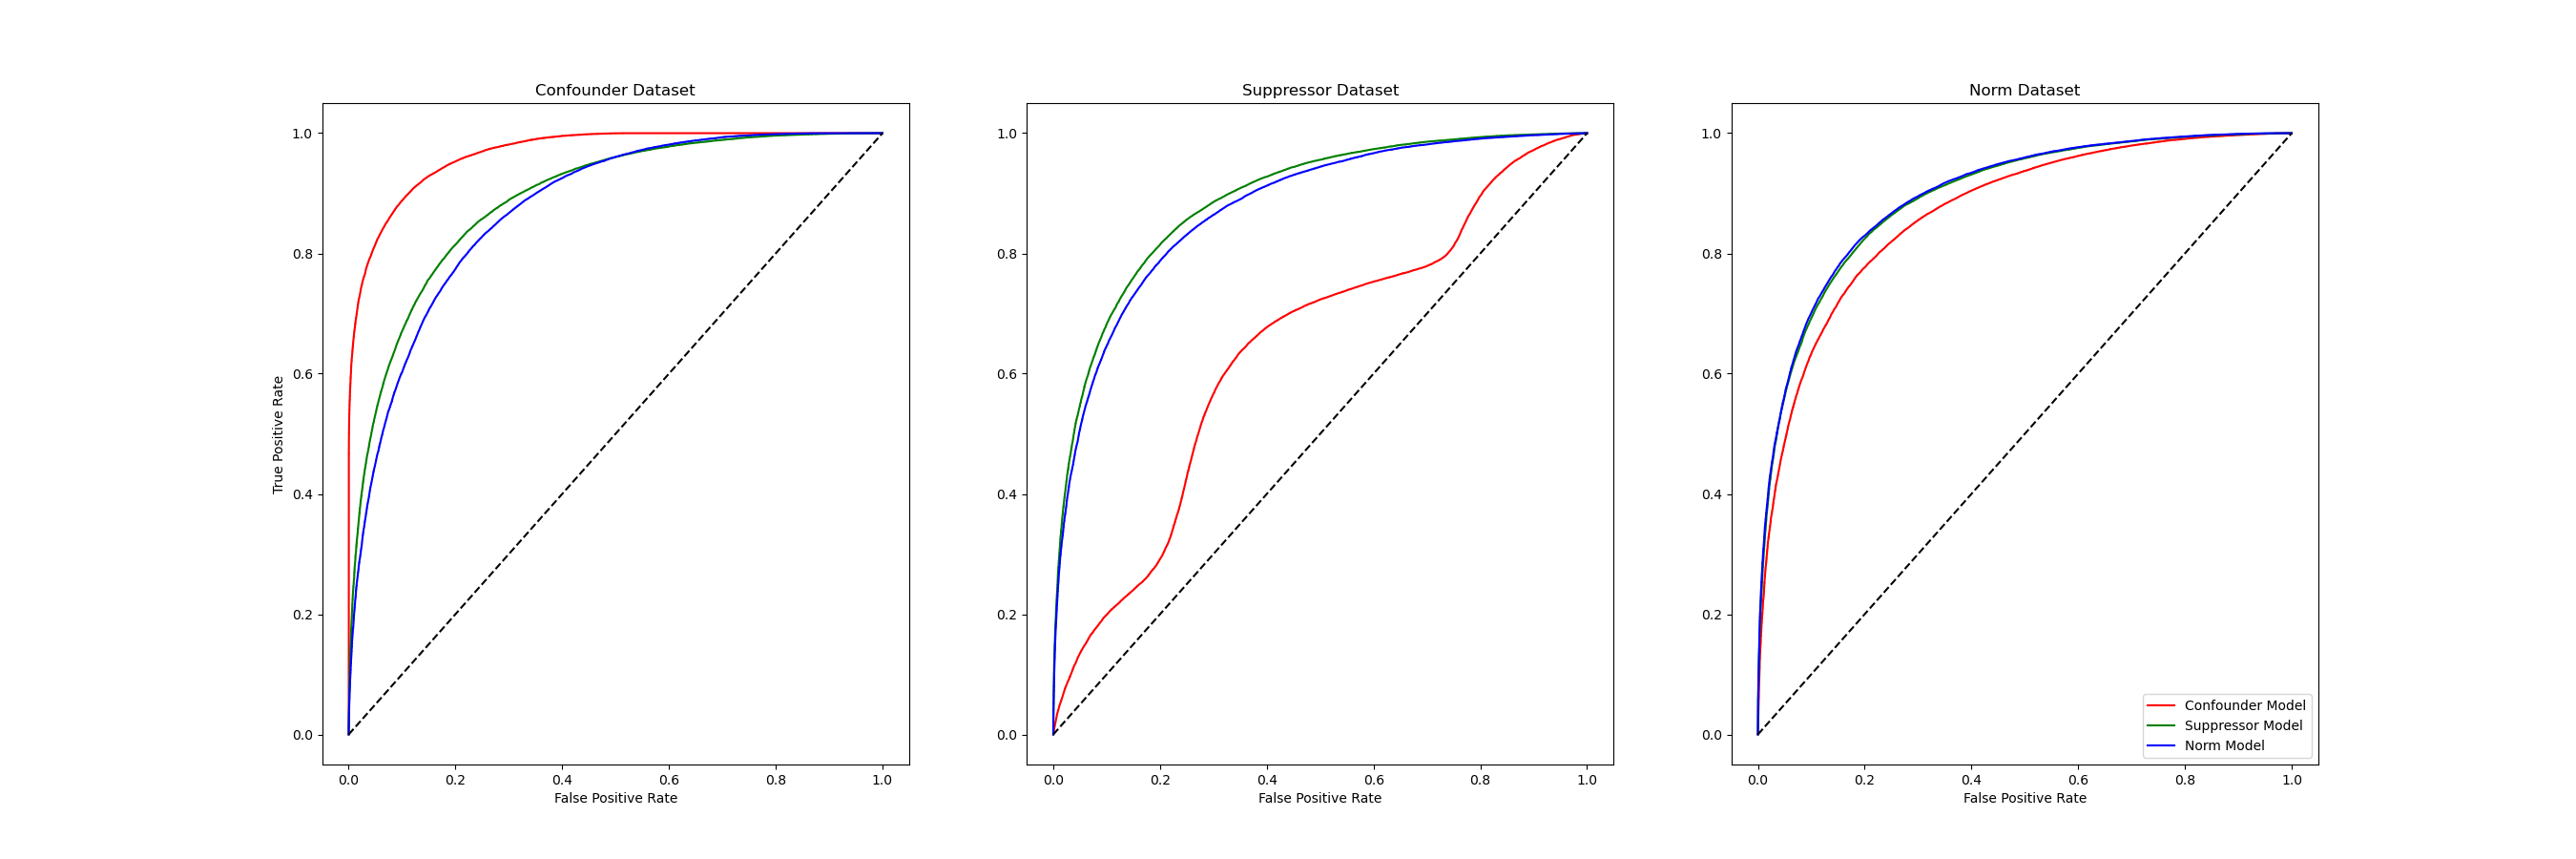

In [33]:
from sklearn.metrics import roc_curve

fig, axs = plt.subplots(1, 3, figsize=(27, 9))

models = ['Confounder', 'Suppressor', 'Norm']
colours = ['r', 'g', 'b']

for i, (test_labels, results) in enumerate([[labels['conf'], [preds['conf']['conf'], preds['sup']['conf'], preds['no']['conf']]], [labels['sup'], [preds['conf']['sup'], preds['sup']['sup'], preds['no']['sup']]], [labels['no'], [preds['conf']['no'], preds['sup']['no'], preds['no']['no']]]]):
    for j, result in enumerate(results):
        fpr, tpr, _ = roc_curve(test_labels, result)
        axs[i].plot(fpr, tpr, color=colours[j], label=f'{models[j]} Model')
        
        # axs[i,j].axis('off')
    axs[i].set_title(f'{models[i]} Dataset')
    axs[i].set_xlabel('False Positive Rate')
    axs[i].plot([0, 1], [0, 1], 'k--') 

axs[0].set_ylabel('True Positive Rate')

# Add legend
axs[2].legend(loc='lower right')

plt.savefig('./figures/coco/roc_curves_coco.png', bbox_inches='tight')
plt.savefig('./figures/coco/roc_curves_coco_hires.png', bbox_inches='tight', dpi=300)

In [6]:
# def hls_to_rgb(h, l, s):
#     r,g,b = 0, 0, 0
#     if s == 0:
#         r,g,b = 1, 1, 1
#     else:
#         if l < 0.5:
#             q = l * (1+s)
#         else:
#             q = l + s - (1*s)
#         p = 2 * l - q

#     print(q)
#     print(p)

# def hue_to_rgb(p, q, t):
#     if (t<0)

SyntaxError: expected ':' (1557615672.py, line 16)

In [ ]:
# hls_to_rgb(0.5,0.5,0.5)

In [ ]:
# # following OpenCV documentation
# def rgb_to_hls(r,g,b):
#     # float division by 0 if r=g=b
#     v_max = max(r,g,b)
#     v_min = min(r,g,b)

#     l = (v_max + v_min)*0.5

#     if l < 0.5:
#         s = (v_max - v_min)/(v_max + v_min)
#     else:
#         s = (v_max - v_min)/(2-(v_max+v_min))

#     if v_max == r:
#         h = 60*(g-b)/(v_max-v_min)
#     elif v_max == g:
#         h = 120 + 60*(b-r)/(v_max-v_min)
#     elif v_max == b:
#         240 + 60*(r-g)/(v_max-v_min)
#     elif r == g == b:
#         h = 0

#     if h < 0:
#         h = h+360

#     return h, l, s

In [ ]:
# rgb_to_hls(255,254,251)